## Unsupervised Machine Learning

# import libraries

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## load the iris dataset from skcit library


In [21]:
from sklearn.datasets import load_iris

In [22]:
iris=load_iris()

##  printing the description of dataset


In [23]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## create pandas dataframe

In [24]:
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

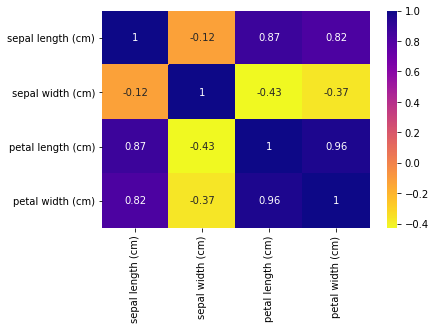

In [25]:
sns.heatmap(df.corr(),annot=True,cmap='plasma_r')
plt.show()

## import necessary function

In [26]:
from sklearn.cluster import KMeans
WCSS=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=0)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)
    

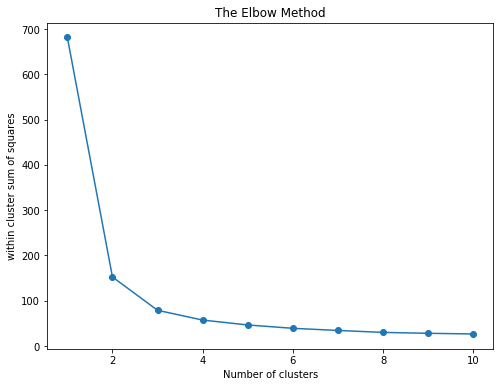

In [27]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),WCSS,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel("within cluster sum of squares")
plt.show()

## Applying K means to dataset and creating the model

In [28]:
kmeans=KMeans(n_clusters=3,random_state=0)
y_kmeans=kmeans.fit_predict(df)

In [13]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualizing the clusters

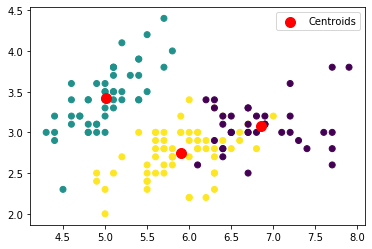

In [29]:
plt.scatter(df['sepal length (cm)'],df["sepal width (cm)"],c=kmeans.labels_)
#plotting the centrois of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.legend()

In [30]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

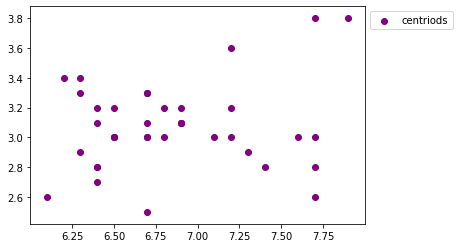

In [31]:
plt.scatter(df[y_kmeans==0]['sepal length (cm)'],df[y_kmeans==0]['sepal width (cm)'],c='purple',label='centriods')
plt.legend(bbox_to_anchor=(1,1),loc=2)